In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
train_path = "fraudTrain.csv"
train_data = pd.read_csv(train_path)

In [186]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [187]:
train_data.shape

(1296675, 23)

In [188]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [189]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [190]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [191]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


Correlation matrix

C:\Users\Kruti Upasani\AppData\Local\Temp\ipykernel_13792\531265909.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


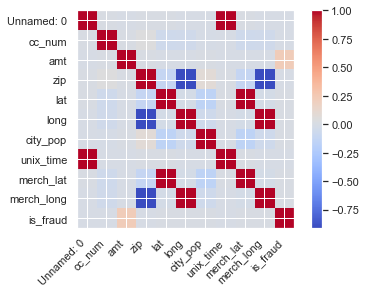

In [192]:
corr_mat = train_data.corr()
plt.imshow(corr_mat, cmap="coolwarm")
plt.colorbar()
variables = []
for col in train_data.columns:
    if train_data[col].dtypes in ['int64', 'float64']:
        variables.append(col)
plt.xticks(range(len(corr_mat)), variables, rotation=45, ha='right')
plt.yticks(range(len(corr_mat)), variables)

plt.show()

In [193]:
train_data.drop(axis=1, columns= ["Unnamed: 0", "cc_num", "zip", "lat", "long", "city_pop", "unix_time", "merch_lat", "merch_long"], inplace=True)

In [194]:
train_data.drop(axis=1, columns=["trans_num", "street", "first", "last"], inplace=True)

In [195]:
train_data.head(10)

,trans_date_trans_time,merchant,category,amt,gender,city,state,job,dob,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,"Psychologist, counselling",1988-03-09,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,Special educational needs teacher,1978-06-21,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,Nature conservation officer,1962-01-19,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,Patent attorney,1967-01-12,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,Dance movement psychotherapist,1986-03-28,0
5,2019-01-01 00:04:08,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,F,Dublin,PA,Transport planner,1961-06-19,0
6,2019-01-01 00:04:42,fraud_Rowe-Vandervort,grocery_net,44.54,F,Holcomb,KS,Arboriculturist,1993-08-16,0
7,2019-01-01 00:05:08,fraud_Corwin-Collins,gas_transport,71.65,M,Edinburg,VA,"Designer, multimedia",1947-08-21,0
8,2019-01-01 00:05:18,fraud_Herzog Ltd,misc_pos,4.27,F,Manor,PA,Public affairs consultant,1941-03-07,0
9,2019-01-01 00:06:01,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,F,Clarksville,TN,Pathologist,1974-03-28,0


In [165]:
fraud = train_data[train_data.is_fraud == 1]
not_fraud = train_data[train_data.is_fraud == 0]

By Category:

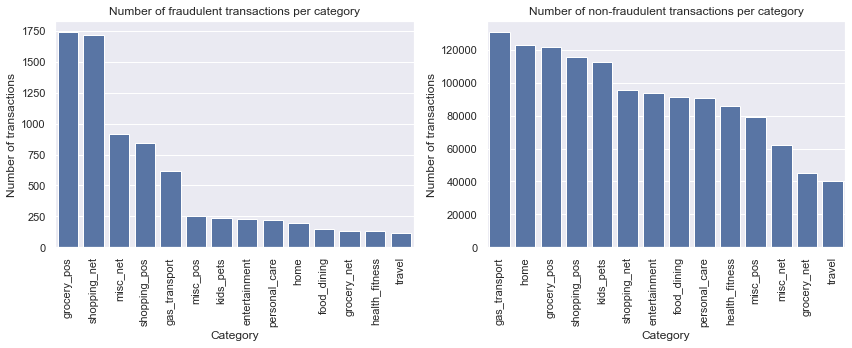

In [196]:
fig, axes = plt.subplots(1, 2, figsize = (12,5))

sns.set_theme()

category_fraud = fraud.category.value_counts().reset_index()
category_fraud.columns = ["Category", "Counts"]
category_not_fraud = not_fraud.category.value_counts().reset_index()
category_not_fraud.columns = ["Category", "Counts"]

sns.barplot(x="Category", y="Counts", data=category_fraud, ax=axes[0])
axes[0].set_title("Number of fraudulent transactions per category")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Number of transactions")
axes[0].tick_params(axis="x", rotation=90)

sns.barplot(x="Category", y="Counts", data=category_not_fraud, ax=axes[1])
axes[1].set_title("Number of non-fraudulent transactions per category")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Number of transactions")
axes[1].tick_params(axis="x", rotation=90)

plt.tight_layout()

By Gender:

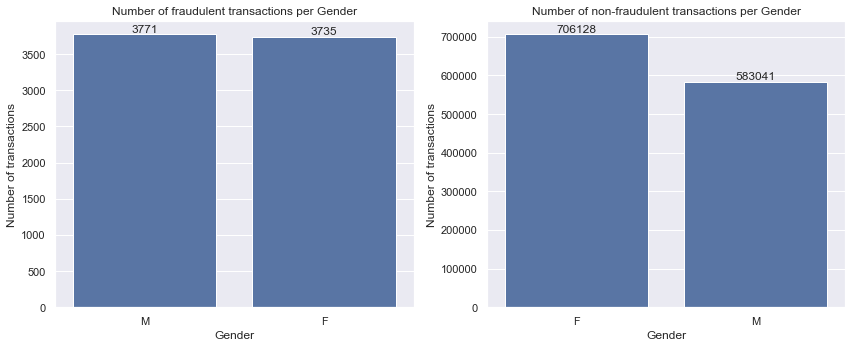

In [197]:
fig, axes = plt.subplots(1, 2, figsize = (12,5))

sns.set_theme()

gender_fraud = fraud.gender.value_counts().reset_index()
gender_fraud.columns = ["Gender", "Counts"]
gender_not_fraud = not_fraud.gender.value_counts().reset_index()
gender_not_fraud.columns = ["Gender", "Counts"]

sns.barplot(x="Gender", y="Counts", data=gender_fraud, ax=axes[0])
axes[0].set_title("Number of fraudulent transactions per Gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of transactions")
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x="Gender", y="Counts", data=gender_not_fraud, ax=axes[1])
axes[1].set_title("Number of non-fraudulent transactions per Gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Number of transactions")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()

By Age:

In [198]:
train_data["trans_year"] = pd.Series(pd.to_datetime(train_data.trans_date_trans_time)).dt.year

train_data["dob"] = pd.Series(pd.to_datetime(train_data.dob)).dt.year

In [199]:
age = pd.Series(train_data.trans_year - train_data.dob)
train_data["age"] = age

In [200]:
bins = [10, 18, 35, 60, 100]
labels = ["14-18", "18-35", "35-60","60+"]
train_data["age_group"] = pd.cut(train_data["age"], bins=bins, labels=labels, right=True)

In [201]:
train_data.drop(axis=1, columns=["age", "dob", "trans_year", "trans_date_trans_time"], inplace=True)

In [202]:
train_data.head(10)

,merchant,category,amt,gender,city,state,job,is_fraud,age_group
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,"Psychologist, counselling",0,18-35
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,Special educational needs teacher,0,35-60
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,Nature conservation officer,0,35-60
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,Patent attorney,0,35-60
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,Dance movement psychotherapist,0,18-35
5,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,F,Dublin,PA,Transport planner,0,35-60
6,fraud_Rowe-Vandervort,grocery_net,44.54,F,Holcomb,KS,Arboriculturist,0,18-35
7,fraud_Corwin-Collins,gas_transport,71.65,M,Edinburg,VA,"Designer, multimedia",0,60+
8,fraud_Herzog Ltd,misc_pos,4.27,F,Manor,PA,Public affairs consultant,0,60+
9,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,F,Clarksville,TN,Pathologist,0,35-60


In [173]:
age_fraud = train_data[train_data.is_fraud == 1].age_group.value_counts().reset_index()
age_fraud.columns = ["Age group", "Counts"]
age_not_fraud =  train_data[train_data.is_fraud == 0].age_group.value_counts().reset_index()
age_not_fraud.columns = ["Age group", "Counts"]

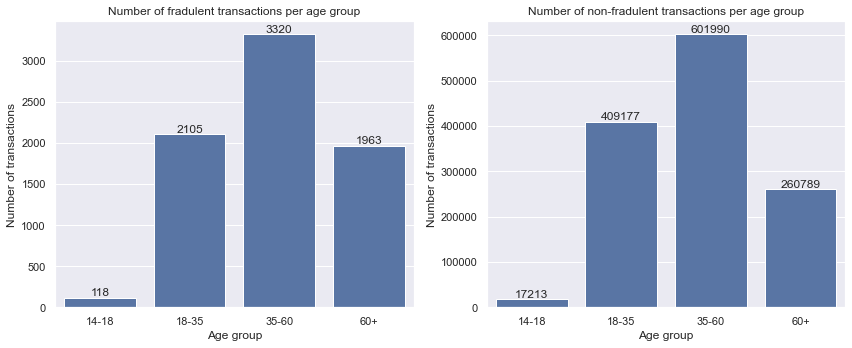

In [203]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.set_theme()

sns.barplot(x="Age group", y="Counts", data=age_fraud, ax=axes[0])
axes[0].set_title("Number of fradulent transactions per age group")
axes[0].set_xlabel("Age group")
axes[0].set_ylabel("Number of transactions")
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x="Age group", y="Counts", data=age_not_fraud, ax=axes[1])
axes[1].set_title("Number of non-fradulent transactions per age group")
axes[1].set_xlabel("Age group")
axes[1].set_ylabel("Number of transactions")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()

By US region

In [204]:
state_to_region = {
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast',
    'MA': 'Northeast', 'RI': 'Northeast', 'CT': 'Northeast',
    'NY': 'Northeast', 'NJ': 'Northeast', 'PA': 'Northeast',
    'OH': 'Midwest', 'IN': 'Midwest', 'IL': 'Midwest', 'MI': 'Midwest',
    'WI': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest',
    'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
    'DE': 'South', 'MD': 'South', 'DC': 'South', 'VA': 'South',
    'WV': 'South', 'NC': 'South', 'SC': 'South',
    'GA': 'South', 'FL': 'South', 'AL': 'South', 'MS': 'South',
    'TN': 'South', 'KY': 'South', 'AR': 'South', 'LA': 'South',
    'OK': 'South', 'TX': 'South', 'MT': 'Rocky Mountains', 'WY': 'Rocky Mountains',
    'CO': 'Rocky Mountains', 'NM': 'Rocky Mountains', 'ID': 'Rocky Mountains',
    'UT': 'Rocky Mountains', 'WA': 'Far West', 'OR': 'Far West',
    'CA': 'Far West', 'HI': 'Far West', 'AK': 'Far West'
}

train_data["Region"] = train_data.state.map(state_to_region)

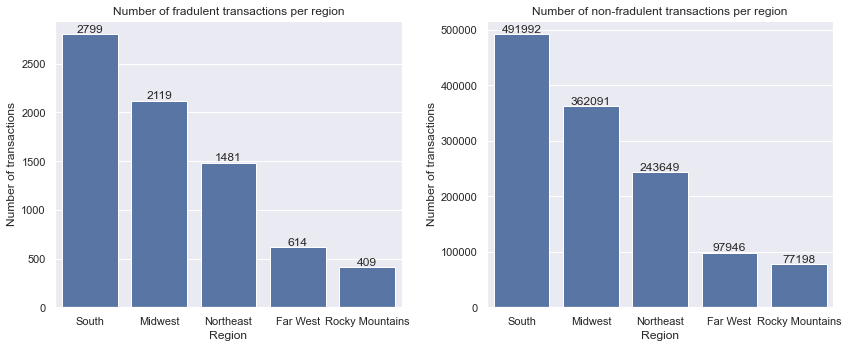

In [205]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.set_theme()

r_fraud = train_data[train_data.is_fraud == 1].Region.value_counts().reset_index()
r_fraud.columns = ["Region", "Counts"]

r_not_fraud = train_data[train_data.is_fraud == 0].Region.value_counts().reset_index()
r_not_fraud.columns = ["Region", "Counts"]


sns.barplot(x="Region", y="Counts", data=r_fraud, ax=axes[0])
axes[0].set_title("Number of fradulent transactions per region")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Number of transactions")
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x="Region", y="Counts", data=r_not_fraud, ax=axes[1])
axes[1].set_title("Number of non-fradulent transactions per region")
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Number of transactions")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()

In [206]:
train_data.drop(axis=1, columns=["job", "merchant"], inplace=True)

Logistic Regression

In [207]:
train_data = pd.get_dummies(train_data, columns = ["category", "gender", "Region", "age_group"], drop_first=True)


In [208]:
train_data.drop(axis=1, columns = ["city", "state"], inplace = True)

In [211]:
features = train_data.drop(axis=1, columns=["is_fraud"], inplace = False)
label = train_data["is_fraud"]


In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Training Logistic Regression Model

In [213]:
log_model = LogisticRegression(penalty="l2", fit_intercept=False, random_state=42)
log_model.fit(features, label)

C:\Users\Kruti Upasani\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(fit_intercept=False, random_state=42)

In [214]:
test = pd.read_csv("fraudTest.csv")

In [215]:
test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [216]:
test.drop(axis=1, columns=['Unnamed: 0', 'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'zip',
       'lat', 'long', 'city_pop', 'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'], inplace=True)

In [217]:
test["Region"] = test.state.map(state_to_region)

In [218]:
test["trans_year"] = pd.Series(pd.to_datetime(test.trans_date_trans_time)).dt.year
test["dob"] = pd.Series(pd.to_datetime(test.dob)).dt.year

age = pd.Series(test.trans_year - test.dob)
test["age"] = age

bins = [10, 18, 35, 60, 100]
labels = ["14-18", "18-35", "35-60", "60+"]
test["age_group"] = pd.cut(test['age'], bins=bins, labels=labels, right=True)

In [219]:
test.drop(axis=1, columns=['dob', 'trans_year', 'trans_date_trans_time', 'age', 'state'], inplace=True)

In [223]:
test_f = pd.get_dummies(test, columns=['category', 'gender', 'Region', 'age_group'], drop_first=True)

In [224]:
test_f = test.drop(axis=1, columns=["is_fraud"], inplace = False)
test_l = test["is_fraud"]

Prediction

In [222]:
pred = log_model.predict(test_f)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Region
- age_group
- category
- gender
Feature names seen at fit time, yet now missing:
- Region_Midwest
- Region_Northeast
- Region_Rocky Mountains
- Region_South
- age_group_18-35
- ...


In [225]:
features.columns

Index(['amt', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'Region_Midwest', 'Region_Northeast',
       'Region_Rocky Mountains', 'Region_South', 'age_group_18-35',
       'age_group_35-60', 'age_group_60+'],
      dtype='object')

In [226]:
test_f.columns

Index(['category', 'amt', 'gender', 'Region', 'age_group'], dtype='object')

In [227]:

test_f = pd.get_dummies(test_f, columns=["category", "gender", "Region", "age_group"], drop_first=True)

missing_cols = set(features.columns) - set(test_f.columns)

for col in missing_cols:
    test_f[col] = 0

extra_cols = set(test_f.columns) - set(features.columns)

test_f.drop(extra_cols, axis=1, inplace=True)

test_f = test_f[features.columns]



In [228]:
# Now, predict using the logistic regression model
pred = log_model.predict(test_f)


In [229]:
accuracy = accuracy_score(test_l, pred)

In [230]:
accuracy

0.995596695452198

In [231]:
test["predictions"] = pred

actual_fraud = test.is_fraud.value_counts()[1]
pred_fraud = test[test.is_fraud == 1].predictions.value_counts()[1]

actual_fraud, pred_fraud

(2145, 8)

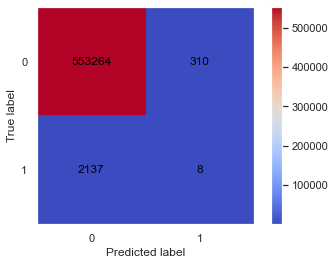

In [232]:
cm = confusion_matrix(test_l, pred)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
matrix.plot(cmap="coolwarm")
for text in matrix.text_.ravel():
    text.set_color("black")
plt.grid(False)
plt.show()